# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark --iversions

pandas     : 1.4.4
seaborn    : 0.11.2
matplotlib : 3.5.2
numpy      : 1.21.5
statsmodels: 0.13.2



In [5]:
# Amostra de dados e criando variáveis que serão utilizadas
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
# Removendo outliers
tips = tips[tips['tip_pct']<.5]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [7]:
# Regressão
reg_a = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.31e-12
Time:                        11:45:47   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
net_bill      -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.0, 0.505398619388979)

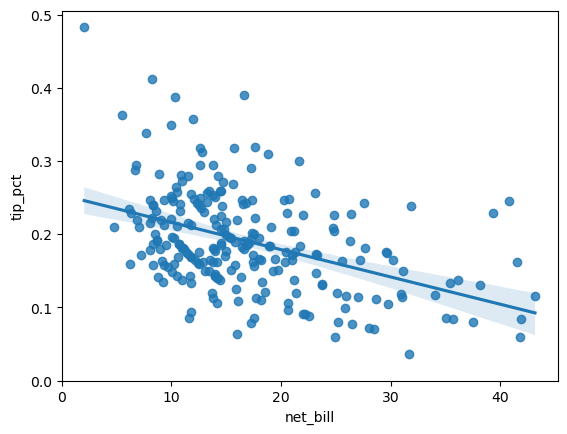

In [8]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips)

plt.xlim(left = 0)
plt.ylim(bottom = 0)

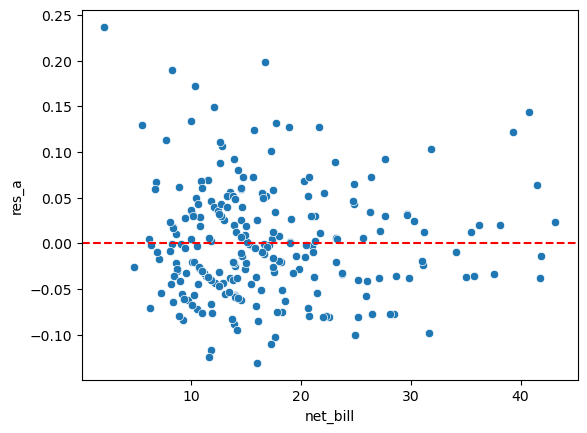

In [9]:
# Gráfico de dispersão do resíduo
tips['res_a'] = reg_a.resid

sns.scatterplot(x = 'net_bill', y = 'res_a', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [10]:
reg_b = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
reg_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     68.11
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.03e-14
Time:                        11:49:18   Log-Likelihood:                 336.29
No. Observations:                 242   AIC:                            -668.6
Df Residuals:                     240   BIC:                            -661.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.3818      0.023     16.261      0.000       0.336       0.428
np.log(net_bill)    -0.0702      0.009     -8.253      0.000      -0.087      -0.053
==============================================================================
Omnibus:                       15.660   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.845
Skew:                           0.631   Prob(JB):                     0.000220
Kurtosis:                       3.280   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

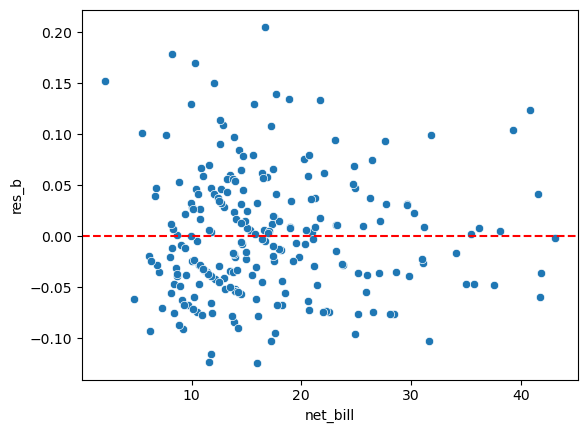

In [11]:
tips['res_b'] = reg_b.resid

sns.scatterplot(x = 'net_bill', y = 'res_b', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

###  3. Ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [12]:
reg_c = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
reg_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     30.98
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           1.09e-12
Time:                        11:51:05   Log-Likelihood:                 333.96
No. Observations:                 242   AIC:                            -661.9
Df Residuals:                     239   BIC:                            -651.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2932      0.020     14.668      0.000       0.254       0.333
net_bill                 -0.0082      0.002     -3.961      0.000      -0.012      -0.004
np.power(net_bill, 2)     0.0001   4.67e-05      2.223      0.027    1.18e-05       0.000
==============================================================================
Omnibus:                       19.830   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.215
Skew:                           0.696   Prob(JB):                     1.50e-05
Kurtosis:                       3.514   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

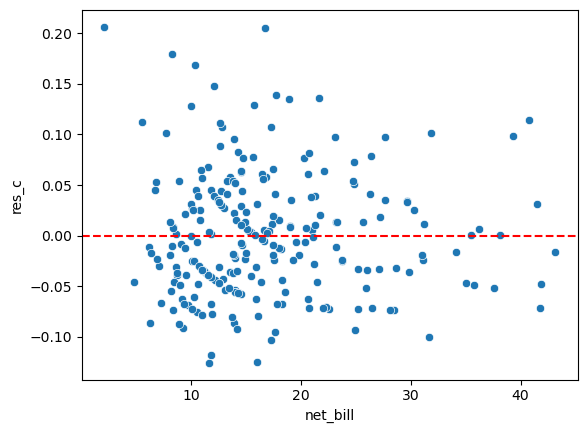

In [13]:
tips['res_c'] = reg_c.resid

sns.scatterplot(x = 'net_bill', y = 'res_c', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

###  4. Ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [14]:
reg_d = smf.ols('np.log(tip_pct) ~ net_bill', data = tips).fit()
reg_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           5.70e-15
Time:                        11:53:16   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.000      -1.439      -1.237
net_bill      -0.0229      0.003     -8.344      0.000      -0.028      -0.018
==============================================================================
Omnibus:                        8.210   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.483
Skew:                          -0.362   Prob(JB):                       0.0144
Kurtosis:                       3.563   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

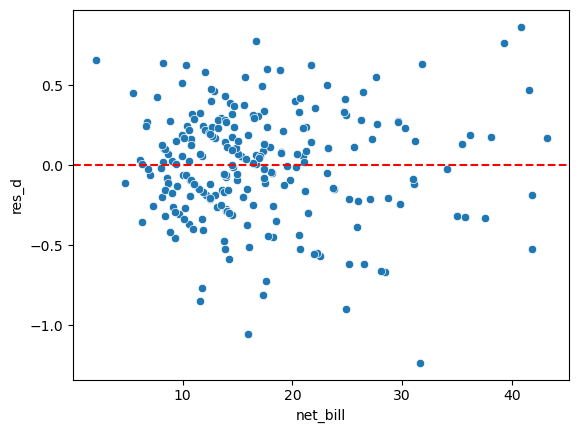

In [15]:
tips['res_d'] = reg_d.resid

sns.scatterplot(x = 'net_bill', y = 'res_d', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [16]:
tips['pred_d'] = reg_d.fittedvalues

r = tips[['pred_d', 'tip_pct']].corr().iloc[0,1]

r**2

0.1894639462920304

###  5. Ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [17]:
reg_e = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
reg_e.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     71.57
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           2.65e-15
Time:                        11:54:53   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)    -0.4027      0.048     -8.460      0.000      -0.496      -0.309
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

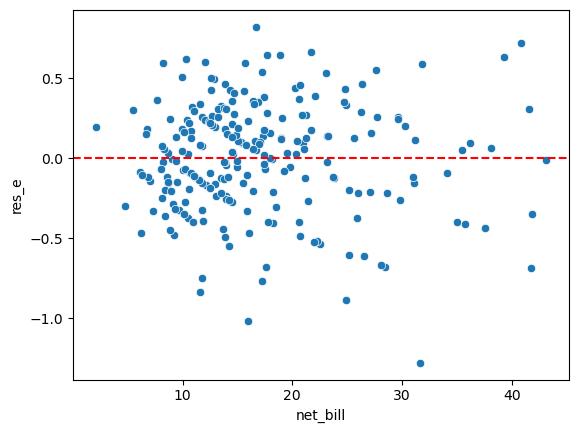

In [18]:
tips['res_e'] = reg_e.resid

sns.scatterplot(x = 'net_bill', y = 'res_e', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
tips['pred_e'] = reg_e.fittedvalues

r = tips[['pred_e', 'tip_pct']].corr().iloc[0,1]

r**2

0.22104786698842288

###  6. Qual modelo resultou no melhor ajuste?

- Os melhores modelos são o 2 e 5, ambos utilizam log da variável net_bill. 
- Encontramos o R² igual a 0,221 em ambos, valor esse superior aos demais modelos.